In [79]:
import numpy as np
import pandas as pd
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import spacy
from spacy import displacy
from cleantext import clean

# Lemmatizing libraries
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet


[how to get latest file](https://stackoverflow.com/questions/39327032/how-to-get-the-latest-file-in-a-folder)

In [66]:
list_of_files = glob.glob('./scitech_data_scraped/*.csv') #
latest_file = max(list_of_files, key=os.path.getctime)

./scitech_data_scraped/scitech_data_2022:12:17:08:31:22-1671294682.879364.csv


In [67]:
sci_tech_data = pd.read_csv(latest_file)

/Users/william/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (17,21,34,63,68,112) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Below I drop duplicate rows.

In [4]:
sci_tech_data.drop_duplicates(subset = ['selftext','title'], inplace=True)

(10673, 128)

Below I select the relevent rows that have tech or science as the subreddits and save the feature space, 'title' and the target, 'subreddit' to respective variables.

In [6]:
sci_tech_data['subreddit_name_prefixed'].value_counts()

r/technology              6692
r/science                 3165
u/MEGA-Technology          193
u/Ok-Technology-1912       142
u/Candid-Science-7189      132
u/Gold-Science-2230         94
u/Away-Technology-4883      63
u/Any-Technology-9975       61
u/Dazzling-Science-652      34
u/AVID-Technology           30
u/Content-Technology-7      19
u/Bugd-Technology            7
u/kretoss-technology         5
u/SecureAge-Technology       4
u/Thin-Science-6996          3
u/OV-Technology              3
u/Slow-Technology-9949       3
u/Ok-Science-1826            2
u/FS-Technology              2
u/A-science-enthusiast       2
u/Efficient-Science-80       1
u/Ok-Science-9480            1
u/No-Technology-2687         1
u/Jaded-Technology-332       1
u/more-technology-00         1
u/Dear-Technology-6015       1
u/Then-Technology-9558       1
u/MR-Technology              1
u/Fearless-Science-103       1
u/Worth-Science-4441         1
u/awesome-technology         1
u/visimens-technology        1
u/Fearle

In [8]:
subreddit = sci_tech_data.loc[(sci_tech_data['subreddit'].isin(
                                ['technology','science']), 'subreddit')]
title = sci_tech_data.loc[(sci_tech_data['subreddit'].isin(
                                ['technology','science']),'title')]

In [9]:
X = title
y = subreddit

technology    6692
science       3165
Name: subreddit, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

[source: strip characters from string in series](https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column)
[source: remove punctuation](https://www.google.com/search?q=how+to+replace+punctuation+with+regular+expression+python&rlz=1C5CHFA_enUS983US983&oq=how+to+replace+punctuation+with+regular&aqs=chrome.1.69i57j33i160l2.10574j0j7&sourceid=chrome&ie=UTF-8#kpvalbx=_7SabY4OANaSs0PEP042roAM_32)

Get rid of puctuation

In [13]:
# punctuation_pattern = '[^\w\s]'
# giveaway_words = ['science', 'technology']
# url_pattern = '[A-Za-z0-9]+://[A-Za-z0-9%-_]+(/[A-Za-z0-9%-_])*(#|\\?)[A-Za-z0-9%-_&=]*'
# remove_group = giveaway_words + [punctuation_pattern] + [url_pattern]

# re.sub('science',repl='', string = X_train[0])


'Individuals who are bullied in the workplace become more vulnerable to conspiracy theories, study finds'

In [23]:
for r in remove_group:
# replace hyphens with space, then remove emojis, punctuation, digits, and urls
    X_train_filtered = X_train.map(lambda x: clean(
                                re.sub('-',repl=' ', string = x) , no_emoji=True,
                                    no_punct=True,no_digits=True, no_urls=True))
    
    X_train_filtered = X_train_filtered.map(lambda x: re.sub('(0|\|)',
                                                        repl='',string = x))
print((sum([len(s) for s in X_train])-sum([len(s) for s in X_train_filtered]))
    /sum([len(s) for s in X_train])
)

# I'll keep (<url>) group in the words, in case there is differential frequency

0.03968479360391208


['proving a point + karma has nothing to do with quality of post',
 'researchers have identified the origins of serious illness in children',
 'no way can science go to this level we as human needs to re think before ai will take over us',
 'a former amazon exec was reportedly paid more than $ in  to run jeff bezos preschool system which mostly comprised  school with  students',
 'iphone  pro max gb alpine green unlocked renewed premium',
 'como faco pra trocar minha foto da cnh',
 'gmail creator predicts chatgpt may challenge googles search engine monopoly',
 'us scientists confirm major breakthrough in nuclear fusion  breakthrough could pave way for abundant clean energy eventually but significant hurdles remain',
 ' best product development low code platforms',
 'disney ceo jokes wife wanted return to avoid presidential run report',
 'i am currently on parrot linux and have an image has a hidden steganographic inside the question is using a command that steghide provides how would i

In [69]:
X_train_filtered

2743     proving a point + karma has nothing to do with...
38       researchers have identified the origins of ser...
2154     no way can science go to this level we as huma...
6283     a former amazon exec was reportedly paid more ...
4832     iphone  pro max gb alpine green unlocked renew...
                               ...                        
2143     supergps technology accurately pinpoints your ...
9685              is email scraping legal resistancephlcom
6919     amazon ceo prime video has very attractive eco...
10362           possible native payment system for twitter
1536     a new study based on  foi requests of over  pa...
Name: title, Length: 7392, dtype: object

###### **Lemmatization** -- [sources](https://www.machinelearningplus.com/nlp/lemmatization-examples-python/)

In [77]:
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/william/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [78]:
for sentence in X_train_filtered:
    print(nltk.pos_tag(nltk.word_tokenize(sentence)))

[('proving', 'VBG'), ('a', 'DT'), ('point', 'NN'), ('+', 'NN'), ('karma', 'NN'), ('has', 'VBZ'), ('nothing', 'NN'), ('to', 'TO'), ('do', 'VB'), ('with', 'IN'), ('quality', 'NN'), ('of', 'IN'), ('post', 'NN')]
[('researchers', 'NNS'), ('have', 'VBP'), ('identified', 'VBN'), ('the', 'DT'), ('origins', 'NNS'), ('of', 'IN'), ('serious', 'JJ'), ('illness', 'NN'), ('in', 'IN'), ('children', 'NNS')]
[('no', 'DT'), ('way', 'NN'), ('can', 'MD'), ('science', 'VB'), ('go', 'VB'), ('to', 'TO'), ('this', 'DT'), ('level', 'NN'), ('we', 'PRP'), ('as', 'IN'), ('human', 'JJ'), ('needs', 'VBZ'), ('to', 'TO'), ('re', 'VB'), ('think', 'NN'), ('before', 'IN'), ('ai', 'NN'), ('will', 'MD'), ('take', 'VB'), ('over', 'RP'), ('us', 'PRP')]
[('a', 'DT'), ('former', 'JJ'), ('amazon', 'NN'), ('exec', 'NN'), ('was', 'VBD'), ('reportedly', 'RB'), ('paid', 'VBD'), ('more', 'JJR'), ('than', 'IN'), ('$', '$'), ('in', 'IN'), ('to', 'TO'), ('run', 'VB'), ('jeff', 'NN'), ('bezos', 'NN'), ('preschool', 'NN'), ('system', '

[Lemmatizing w/ POS](https://www.machinelearningplus.com/nlp/lemmatization-examples-python/)

In [82]:
print(nltk.pos_tag(['feet']))
#> [('feet', 'NNS')]

print(nltk.pos_tag(nltk.word_tokenize(sentence)))
#> [('The', 'DT'), ('striped', 'JJ'), ('bats', 'NNS'), ('are', 'VBP'), ('hanging', 'VBG'), ('on', 'IN'), ('their', 'PRP$'), ('feet', 'NNS'), ('for', 'IN'), ('best', 'JJS')]
# nltk.pos_tag() returns a tuple with the POS tag. The key here is to map NLTK’s POS tags to the format wordnet lemmatizer would accept. The get_wordnet_pos() function defined below does this mapping job.

# Lemmatize with POS Tag

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)




[('feet', 'NNS')]
[('a', 'DT'), ('new', 'JJ'), ('study', 'NN'), ('based', 'VBN'), ('on', 'IN'), ('foi', 'JJ'), ('requests', 'NNS'), ('of', 'IN'), ('over', 'IN'), ('pages', 'NNS'), ('found', 'VBN'), ('that', 'IN'), ('coca', 'NN'), ('cola', 'NN'), ('exerts', 'NNS'), ('direct', 'JJ'), ('influence', 'NN'), ('on', 'IN'), ('academic', 'JJ'), ('institutions', 'NNS'), ('and', 'CC'), ('organizations', 'NNS'), ('that', 'IN'), ('convene', 'JJ'), ('major', 'JJ'), ('public', 'JJ'), ('health', 'NN'), ('conferences', 'NNS'), ('and', 'CC'), ('events', 'NNS'), ('and', 'CC'), ('makes', 'VBZ'), ('payments', 'NNS'), ('directly', 'RB'), ('to', 'TO'), ('speakers', 'NNS'), ('and', 'CC'), ('researchers', 'NNS'), ('conditional', 'VBP'), ('on', 'IN'), ('media', 'NNS'), ('interviews', 'NNS')]
foot
['The', 'strip', 'bat', 'be', 'hang', 'on', 'their', 'foot', 'for', 'best']


In [85]:
X_train_filtered

2743     proving a point + karma has nothing to do with...
38       researchers have identified the origins of ser...
2154     no way can science go to this level we as huma...
6283     a former amazon exec was reportedly paid more ...
4832     iphone  pro max gb alpine green unlocked renew...
                               ...                        
2143     supergps technology accurately pinpoints your ...
9685              is email scraping legal resistancephlcom
6919     amazon ceo prime video has very attractive eco...
10362           possible native payment system for twitter
1536     a new study based on  foi requests of over  pa...
Name: title, Length: 7392, dtype: object

In [86]:
lemmatizer = WordNetLemmatizer()

X_train_lemmatized = []
for title in X_train_filtered:
    X_train_lemmatized.append(' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for \
                               w in nltk.word_tokenize(title)]))
X_train_lemmatized;

['prove a point + karma have nothing to do with quality of post',
 'researcher have identify the origin of serious illness in child',
 'no way can science go to this level we a human need to re think before ai will take over u',
 'a former amazon exec be reportedly paid more than $ in to run jeff bezos preschool system which mostly comprise school with student',
 'iphone pro max gb alpine green unlocked renew premium',
 'como faco pra trocar minha foto da cnh',
 'gmail creator predicts chatgpt may challenge google search engine monopoly',
 'u scientist confirm major breakthrough in nuclear fusion breakthrough could pave way for abundant clean energy eventually but significant hurdle remain',
 'best product development low code platform',
 'disney ceo joke wife want return to avoid presidential run report',
 'i be currently on parrot linux and have an image have a hidden steganographic inside the question be use a command that steghide provide how would i get the passphrase to find the 

In [88]:
X_train_lemmatized = pd.Series(data = X_train_lemmatized, index = X_train_filtered.index)

In [89]:
X_train_lemmatized

2743     prove a point + karma have nothing to do with ...
38       researcher have identify the origin of serious...
2154     no way can science go to this level we a human...
6283     a former amazon exec be reportedly paid more t...
4832     iphone pro max gb alpine green unlocked renew ...
                               ...                        
2143     supergps technology accurately pinpoint your p...
9685                 be email scrap legal resistancephlcom
6919     amazon ceo prime video have very attractive ec...
10362           possible native payment system for twitter
1536     a new study base on foi request of over page f...
Length: 7392, dtype: object

In [134]:
# back to DataFrame
df = pd.DataFrame(X_train_lemmatized, columns = ['title']).join(pd.DataFrame(y_train))

In [174]:
df.index = range(df.shape[0])

###### With words lemmatized I will proceed with EDA

Below I will inspect various distributions of title statistics.

In [178]:
df['title_length'] = [len(df.loc[i,'title']) for i in range(len(df['title']))]

In [180]:
df['title_word_count'] = [len(df.loc[i,'title'].split(' ')) for i in range(len(df['title']))]

In [188]:
import seaborn as sns

[Text(0.5, 1.0, 'Distribution of title word counts by subreddit')]

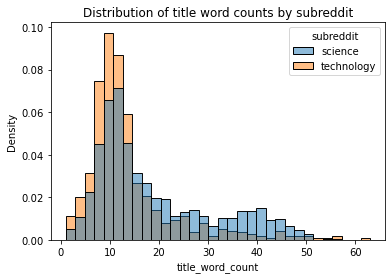

In [206]:
sns.histplot(data = df, x = 'title_word_count', hue = 'subreddit', stat='density', common_norm = False).set(title = 'Distribution of title word counts by subreddit')

Above we can see that shorter titles have a better chance of having been posted to technology, while longer titles are more likely from science even after accounting for baseline frequencies.

Above we see that there are many posts between 0 and 20 words long with a 

[Text(0.5, 1.0, 'Distribution of title character length by subreddit')]

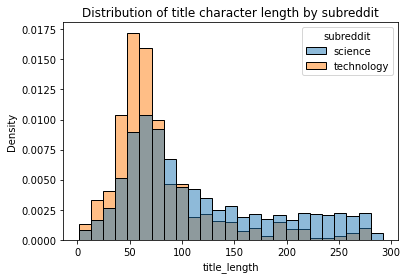

In [208]:
sns.histplot(data = df, x = 'title_length', hue = 'subreddit', stat='density', common_norm = False).set(title = 'Distribution of title character length by subreddit')

Above we see that title character lengths under around 80 are more likely to have been from technology, and after that from science.